In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [1]:
#@title font

def decrease_font():
  from IPython.display import Javascript
  display(Javascript('''
  for (rule of document.styleSheets[0].cssRules){
    if (rule.selectorText=='body') {
      rule.style.fontSize = '12px'
      break
    }
  }
  '''))
get_ipython().events.register('pre_run_cell', decrease_font)

In [2]:
%pwd
base_dir = '/content/drive/MyDrive/repos/AOPG/'
%cd {base_dir}

<IPython.core.display.Javascript object>

/content/drive/MyDrive/repos/AOPG


In [3]:
%mkdir -p /content/data_sets/DIOR/
%mkdir -p /content/data_sets/DIOR/ImageSets
%mkdir -p /content/data_sets/DIOR/DIOR
%mkdir -p /content/data_sets/DIOR/DIOR/Annotations
!nvidia-smi

<IPython.core.display.Javascript object>

/content/drive/MyDrive/repos/AOPG
Sat Nov 12 10:36:08 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   35C    P8     9W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                      

In [ ]:
%cp /content/drive/MyDrive/repos/data_sets/DIOR/Annotations.zip /content/data_sets/DIOR/
%cd /content/data_sets/DIOR/
!unzip Annotations.zip

In [ ]:
%cp /content/drive/MyDrive/repos/data_sets/DIOR/JPEGImages-trainval.zip /content/data_sets/DIOR/
%cd /content/data_sets/DIOR/
!unzip JPEGImages-trainval.zip

In [ ]:
%cp /content/drive/MyDrive/repos/data_sets/DIOR/JPEGImages-test.zip /content/data_sets/DIOR/
%cd /content/data_sets/DIOR/
!unzip JPEGImages-test.zip

In [7]:
%cp /content/drive/MyDrive/repos/data_sets/DIOR/ImageSets.zip /content/data_sets/DIOR/
%cd /content/data_sets/DIOR/
!unzip ImageSets.zip -d /content/data_sets/DIOR/ImageSets/
!cp /content/data_sets/DIOR/ImageSets/Main/train.txt /content/data_sets/DIOR/ImageSets/Main/trainval.txt
!cat /content/data_sets/DIOR/ImageSets/Main/val.txt >> /content/data_sets/DIOR/ImageSets/Main/trainval.txt


<IPython.core.display.Javascript object>

/content/data_sets/DIOR
Archive:  ImageSets.zip
   creating: /content/data_sets/DIOR/ImageSets/Layout/
   creating: /content/data_sets/DIOR/ImageSets/Main/
  inflating: /content/data_sets/DIOR/ImageSets/Main/test.txt  
  inflating: /content/data_sets/DIOR/ImageSets/Main/train.txt  
  inflating: /content/data_sets/DIOR/ImageSets/Main/val.txt  
   creating: /content/data_sets/DIOR/ImageSets/Segmentation/


In [8]:
!ln -s /content/data_sets/DIOR/Annotations/"Oriented Bounding Boxes" /content/data_sets/DIOR/DIOR/Annotations/obb
!ln -s /content/data_sets/DIOR/ImageSets /content/data_sets/DIOR/DIOR/ImageSets

<IPython.core.display.Javascript object>

In [9]:
!ln -s /content/data_sets/DIOR/JPEGImages-trainval /content/data_sets/DIOR/DIOR/JPEGImages

<IPython.core.display.Javascript object>

In [10]:
#!ln -s /content/data_sets/DIOR/JPEGImages-test /content/data_sets/DIOR/DIOR/JPEGImages

<IPython.core.display.Javascript object>

In [3]:
#@title setup and install
%cd {base_dir}
%cd BboxToolkit
!pip install -v -e .  # or "python setup.py develop"
%cd ..

# install the OBBDetection
!pip install -r requirements/build.txt
!pip install mmpycocotools
!pip install terminaltables
!pip install libsvm
!pip install mmcv==0.6.2
!pip install -v -e .  # or "python setup.py develop"

<IPython.core.display.Javascript object>

/content/drive/MyDrive/repos/AOPG
/content/drive/MyDrive/repos/AOPG/BboxToolkit
Using pip 21.1.3 from /usr/local/lib/python3.7/dist-packages/pip (python 3.7)
Value for scheme.platlib does not match. Please report this to <https://github.com/pypa/pip/issues/9617>
distutils: /usr/local/lib/python3.7/dist-packages
sysconfig: /usr/lib/python3.7/site-packages
Value for scheme.purelib does not match. Please report this to <https://github.com/pypa/pip/issues/9617>
distutils: /usr/local/lib/python3.7/dist-packages
sysconfig: /usr/lib/python3.7/site-packages
Value for scheme.headers does not match. Please report this to <https://github.com/pypa/pip/issues/9617>
distutils: /usr/local/include/python3.7/UNKNOWN
sysconfig: /usr/include/python3.7m/UNKNOWN
Value for scheme.scripts does not match. Please report this to <https://github.com/pypa/pip/issues/9617>
distutils: /usr/local/bin
sysconfig: /usr/bin
Value for scheme.data does not match. Please report this to <https://github.com/pypa/pip/issues/9

In [ ]:
#@title train
%pwd
base_dir = '/content/drive/MyDrive/repos/AOPG/'
%cd {base_dir}
!python3 tools/train.py configs/obb/aopg/aopg_r50_fpn_1x_dior.py


In [ ]:
#@title test
%pwd
base_dir = '/content/drive/MyDrive/repos/AOPG/'
%cd {base_dir}
!python3 tools/test.py configs/obb/aopg/aopg_r50_fpn_1x_dior.py work_dirs/aopg_r50_fpn_1x_dior/latest.pth --eval mAP

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

/content/drive/MyDrive/repos/AOPG
Starting loading DIOR obb dataset information.
Finishing loading DIOR obb, get 11738 images, using 6.419s.
/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:566: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
[                                                  ] 0/11738, elapsed: 0s, ETA:/usr/local/lib/python3.7/dist-packages/torch/functional.py:478: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  ../aten/src/ATen/native/TensorShape.cpp:2894.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
[>>] 11738/1

In [4]:
#@title imports
base_dir = '/content/drive/MyDrive/repos/AOPG/'
%cd {base_dir}
import os
import matplotlib.pyplot as plt
#import seaborn as sns
import numpy as np
import scipy.stats as stats
import os.path as osp
import xml.etree.ElementTree as ET

#import shapely.geometry as shgeo
import pandas as pd
import sys
sys.path.append(base_dir) # go to parent dir
import mmcv
from mmdet.datasets.metrics.brisque import calc_brisque, show_image
import BboxToolkit as bt
#from mmdet.core.evaluation.bbox_overlaps import bbox_overlaps
#from mmdet.apis import init_detector, inference_detector
import cv2

from tqdm import tqdm
%matplotlib inline

<IPython.core.display.Javascript object>

/content/drive/MyDrive/repos/AOPG


/usr/local/lib/python3.7/dist-packages/skimage/io/manage_plugins.py:23: UserWarning: Your installed pillow version is < 7.1.0. Several security issues (CVE-2020-11538, CVE-2020-10379, CVE-2020-10994, CVE-2020-10177) have been fixed in pillow 7.1.0 or higher. We recommend to upgrade this library.
  from .collection import imread_collection_wrapper


In [5]:
wordname_20 = ['airplane', 'airport', 'baseballfield', 'basketballcourt',
               'bridge', 'chimney', 'dam', 'Expressway-Service-area', 'Expressway-toll-station',
               'golffield', 'groundtrackfield', 'harbor', 'overpass', 'ship', 'stadium', 'storagetank',
               'tenniscourt', 'trainstation', 'vehicle', 'windmill']

result_dir = base_dir + 'results/DIOR/'
datapath = '/content/data_sets/DIOR/DIOR/'
img_prefix = datapath + '/JPEGImages'
ann_file = datapath + '/ImageSets/Main/trainval.txt'
%mkdir -p result_dir

quality_thr = 125
max_bins = 10
max_brisque_bins = 2


<IPython.core.display.Javascript object>

In [6]:
#@title plot functions
def plot_pi(arr, title, labels):
    clean_arr = [x for x in arr if str(x) != 'nan']
    plt.pie(clean_arr, labels=labels)
    plt.title(title)
    plt.show()

def plot_hist(arr, title, save_file):
    clean_arr = [x for x in arr if str(x) != 'nan']
    plt.hist(clean_arr, bins='auto')
    plt.title(title)
    if save_file is None:
        plt.show()
    else:
        plt.savefig(save_file)
        plt.close()

<IPython.core.display.Javascript object>

In [7]:
def GetFileFromThisRootDir(dir,ext = None):
    allfiles = []
    needExtFilter = (ext != None)
    for root,dirs,files in os.walk(dir):
      for filespath in files:
        filepath = os.path.join(root, filespath)
        extension = os.path.splitext(filepath)[1][1:]
        if needExtFilter and extension in ext:
          allfiles.append(filepath)
        elif not needExtFilter:
          allfiles.append(filepath)
    return allfiles

<IPython.core.display.Javascript object>

In [8]:
labelparent = os.path.join(datapath, 'ImageSets/Main')
imageparent = os.path.join(datapath, 'JPEGImages')
filenames = GetFileFromThisRootDir(labelparent)
imagenames = GetFileFromThisRootDir(imageparent)

%cd {base_dir}

<IPython.core.display.Javascript object>

/content/drive/MyDrive/repos/AOPG


In [10]:
num_of_classes = len(wordname_20)
mode = 'train'
bin_area_thresh_file = result_dir + 'bin_area_thresh_' + mode + '.csv'
bin_quality_thresh_file = result_dir + 'bin_quality_thresh_' + mode + '.csv'
t_areas = []
t_qualities = []
t_categories = []

total_objects = 0
cls_names = wordname_20

img_ids = mmcv.list_from_file(ann_file)
with tqdm(total=len(img_ids), file=sys.stdout) as pbar:
    for img_id in img_ids:
        pbar.set_description('processed:')
        pbar.update(1)
        
        img_id_int = int(img_id)
        xml_path = osp.join(datapath, 'Annotations/obb',
                            '{}.xml'.format(img_id))
        _filename = 'JPEGImages/{}.jpg'.format(img_id)
        filename = osp.join(datapath, _filename)
        tree = ET.parse(xml_path)
        root = tree.getroot()
        
        for obj in root.findall('object'):
            difficulty = 1
            name = obj.find('name').text
            label = cls_names.index(name)
            bnd_box = obj.find('robndbox')
            ignore = False
            if bnd_box != None:
                boxpoly = np.array([
                [int(bnd_box.find('x_left_top').text),
                int(bnd_box.find('y_left_top').text)],
                [int(bnd_box.find('x_right_top').text),
                int(bnd_box.find('y_right_top').text)],
                [int(bnd_box.find('x_right_bottom').text),
                int(bnd_box.find('y_right_bottom').text)],
                [int(bnd_box.find('x_left_bottom').text),
                int(bnd_box.find('y_left_bottom').text)]
                ])

                total_objects += 1
                rect = cv2.minAreaRect(boxpoly)
                width = int(rect[1][0])
                height = int(rect[1][1])
                
                if width > 2 and height > 2:
                    category_id = cls_names.index(name)
                    
                    quality = calc_brisque(filename, boxpoly, 'obb')
                    area = width*height
                    t_areas.append(area)
                    t_qualities.append(quality)
                    #if quality == 155.845 and category_id == 13:
                    #    width = 0

print("total objs num = ", total_objects)

max_bins = 10
df_area = pd.DataFrame({ 'area': t_areas},
                        index=None, columns=None)
df_area['area_group'], area_bin_threshs = pd.qcut(df_area['area'], max_bins, labels=None, retbins=True, duplicates='drop')
#df_all['area_group'] = pd.cut(df_all['area'], bin_ths_clean, labels=None, retbins=False)
pd.DataFrame(area_bin_threshs).to_csv(bin_area_thresh_file, index=False, header=False)
print(df_area['area_group'].value_counts())
print(area_bin_threshs)

max_bins = 10
df_quality = pd.DataFrame({ 'quality': t_qualities},
                        index=None, columns=None)
df_quality['quality_group'], quality_bin_threshs = pd.qcut(df_quality['quality'], max_bins, labels=None, retbins=True, duplicates='drop')
#df_all['area_group'] = pd.cut(df_all['area'], bin_ths_clean, labels=None, retbins=False)
pd.DataFrame(quality_bin_threshs).to_csv(bin_quality_thresh_file, index=False, header=False)
print(df_quality['quality_group'].value_counts())
print(quality_bin_threshs)

<IPython.core.display.Javascript object>

processed:: 100%|██████████| 11725/11725 [48:32<00:00,  4.03it/s]
total objs num =  68073
(287.0, 455.0]         6908
(11.999, 160.0]        6800
(160.0, 287.0]         6798
(16400.8, 41208.0]     6798
(2008.4, 5146.0]       6797
(5146.0, 16400.8]      6794
(41208.0, 528303.0]    6794
(697.0, 1104.0]        6786
(1104.0, 2008.4]       6778
(455.0, 697.0]         6704
Name: area_group, dtype: int64
[1.20000e+01 1.60000e+02 2.87000e+02 4.55000e+02 6.97000e+02 1.10400e+03
 2.00840e+03 5.14600e+03 1.64008e+04 4.12080e+04 5.28303e+05]
(119.22, 155.845]     20398
(-43.198, 18.924]      6808
(42.544, 51.359]       6808
(18.924, 27.33]        6807
(27.33, 34.824]        6807
(34.824, 42.544]       6807
(51.359, 67.506]       6807
(67.506, 119.22]       6807
(155.845, 170.015]       24
Name: quality_group, dtype: int64
[-43.19714619  18.92391252  27.32959002  34.82389648  42.54432548
  51.35867092  67.5059319  119.21951323 155.845      170.01525529]


In [11]:
df_quality

<IPython.core.display.Javascript object>

,quality,quality_group
0,27.662773,"(27.33, 34.824]"
1,155.845000,"(119.22, 155.845]"
2,155.845000,"(119.22, 155.845]"
3,155.845000,"(119.22, 155.845]"
4,50.328143,"(42.544, 51.359]"
...,...,...
68068,155.845000,"(119.22, 155.845]"
68069,155.845000,"(119.22, 155.845]"
68070,155.845000,"(119.22, 155.845]"
68071,37.774683,"(34.824, 42.544]"


In [ ]:
# Specify the path to model config and checkpoint file
config_file = base_dir + 'configs/DIOR/aware_dif.py'
checkpoint_file = base_dir + 'work_dirs/aware_dif/latest.pth'

# build the model from a config file and a checkpoint file
model = init_detector(config_file, checkpoint_file, device='cuda')
df_name = 'df_all_dif'

<IPython.core.display.Javascript object>

load checkpoint from local path: /content/drive/MyDrive/afeka/RobustCurriculum/code/AerialDetection/work_dirs/aware_dif/latest.pth


In [ ]:
#@title create full db: bin, score, iou, brisque from model
num_of_classes = len(wordname_20)
area_count = []
cat_qualities = []
cat_areas = []
full_db = []
detections = []
t_areas = []
t_ious = []
t_scores = []
t_qualities = []

class_bin_array = np.zeros((num_of_classes, max_bins), dtype=int)
class_bin_array2 = np.zeros((num_of_classes, max_bins), dtype=int)
quality_bin_array = np.zeros((num_of_classes, max_bins), dtype=int)
cat_bin_threshs = np.zeros((num_of_classes, max_bins+1), dtype=float) #np.zeros(max_bins)
bin_brisque_threshs = np.zeros((num_of_classes, max_bins, max_brisque_bins+1), dtype=float) #np.zeros(max_bins)
bin_threshs = np.zeros(max_bins+1)
for i in range(num_of_classes):
    # In each iteration, add an empty list to the main list
    area_count.append([])
    cat_qualities.append([])
    cat_areas.append([])
    
total_objects = 0
cls_names = wordname_20
max_quality = 155.845

img_ids = mmcv.list_from_file(ann_file)
with tqdm(total=len(img_ids), file=sys.stdout) as pbar:
    for img_id in img_ids:
        pbar.set_description('processed:')
        pbar.update(1)
        
        img_id_int = int(img_id)
        subdir_name = 'dir_{0:0>3}'.format(int((img_id_int-1)/2000 + 1))
        _filename = 'JPEGImages/{}/{}.jpg'.format(subdir_name, img_id)
        filename = osp.join(datapath, _filename)
        proposals = inference_detector(model, filename)
        
        detections.append(proposals)
        #model.show_result(filename, result, score_thr=0, out_file='/Users/spok/repos/RobustCurriculum/results/result.jpg')

        xml_path = osp.join(datapath, 'Annotations/' + subdir_name,
                            '{}.xml'.format(img_id))
        #print(xml_path)
        tree = ET.parse(xml_path)
        root = tree.getroot()
        #bboxes_ignore = []
        #labels_ignore = []
        
        
        for obj in root.findall('object'):
            name = obj.find('name').text
            label = cls_names.index(name)
            bnd_box = obj.find('bndbox')
            ignore = False
            if bnd_box == None:
                bnd_box = obj.find('robndbox')
                
            if bnd_box != None:
                xmin = float(bnd_box.find('xmin').text)
                ymin = float(bnd_box.find('ymin').text)
                xmax = float(bnd_box.find('xmax').text)
                ymax = float(bnd_box.find('ymax').text)

                total_objects += 1

                width, height = xmax - xmin, ymax - ymin
                area = width*height
                quality = max_quality
                cat_areas[label].append(area)
                    
                gt_bbox = [[xmin, ymin, xmax, ymax]]
                gt_label = label

                if width > 2 and height > 2:
                    quality = calc_brisque(filename, [int(xmin), int(ymin), int(width), int(height)])
                    cat_qualities[label].append(quality)
                    #if quality == 155.845 and category_id == 13:
                    #    width = 0
                else:
                    cat_qualities[label].append(quality)
                    
                _ious = []
                for i in range(num_of_classes):
                    if proposals[i].ndim == 2 and proposals[i].shape[1] == 5:
                        scores = proposals[i][:, 4]
                        sort_idx = np.argsort(scores)[::-1]
                        img_proposal = proposals[i][sort_idx, :]
                    else:
                        img_proposal = proposals[i]
                    #prop_num = min(img_proposal.shape[0], proposal_nums[-1])
                    prop_num = img_proposal.shape[0]
                
                    class_ious = bbox_overlaps(
                        np.array(gt_bbox),
                        #np.array(result),
                        img_proposal[:prop_num, :4],
                        #result[:num_of_classes, :4],
                        use_legacy_coordinate=False)
                    if class_ious.size == 0:
                        class_ious = np.zeros(1)
                    _ious.append(class_ious)#np.max(ious))
                max_ious = [np.max(i) for i in _ious]
                max_class_iou = max(max_ious)
                max_iou_score = 0
                if max_class_iou != 0:
                    max_iou_class_idx = max_ious.index(max_class_iou)
                    #if (gt_labels)
                    max_iou_score_idx = np.where(_ious[max_iou_class_idx][0] == max_class_iou)
                    max_iou_score = proposals[max_iou_class_idx][max_iou_score_idx][0][4]
                    #print(max_iou_score, max_class_iou)
                t_ious.append(max_class_iou)
                t_scores.append(max_iou_score)
                t_areas.append(area)
                t_qualities.append(quality)
                
        
        #if total_objects > 200:
        #    break
        

print("total objs num = ", total_objects)

df_all = pd.DataFrame({ 'area': t_areas,
                        'score': t_scores,
                        'iou': t_ious,
                        'quality': t_qualities}, index=None, columns=None)
df_all['area_group'], bin_threshs = pd.qcut(df_all['area'], max_bins, labels=None, retbins=True)
pd.DataFrame(df_all).to_csv(result_dir + df_name + '.csv', index=True, header=True)
print(df_all['area_group'].value_counts())
pd.DataFrame(bin_threshs).to_csv(result_dir + 'bin_thresh.csv', index=False, header=False)


<IPython.core.display.Javascript object>

processed::  48%|████▊     | 5663/11725 [1:36:49<2:02:39,  1.21s/it]

/content/drive/MyDrive/afeka/RobustCurriculum/code/AerialDetection/mmdet/datasets/metrics/brisque.py:92: RuntimeWarning: divide by zero encountered in true_divide
  return np.sqrt(left_squares) / np.sqrt(right_squares)
/content/drive/MyDrive/afeka/RobustCurriculum/code/AerialDetection/mmdet/datasets/metrics/brisque.py:79: RuntimeWarning: invalid value encountered in true_divide
  return r_hat * numerator / denominator


processed:: 100%|██████████| 11725/11725 [3:33:05<00:00,  1.09s/it]
total objs num =  68073
(224.0, 390.0]         6866
(-0.001, 224.0]        6852
(908.6, 1431.0]        6813
(1431.0, 2600.0]       6811
(54272.8, 584069.0]    6808
(6674.0, 19734.0]      6806
(19734.0, 54272.8]     6806
(2600.0, 6674.0]       6800
(602.0, 908.6]         6771
(390.0, 602.0]         6740
Name: area_group, dtype: int64


In [ ]:
data_types = ['area', 'score', 'iou', 'quality']
df_all_clean = pd.read_csv(result_dir + 'df_all_clean.csv')
df_all_dif = pd.read_csv(result_dir + 'df_all_dif.csv')
x = range(max_bins)

for data_type in data_types:
    y_c = df_all_clean[data_type]['mean']
    err_c = df_all_clean[data_type]['std']
    y_d = df_all_dif[data_type]['mean']
    err_d = df_all_dif[data_type]['std']

    # Plot error bar
    plt.title('DIOR area bins stats using ' + data_type)
    plt.xlabel('area bin #')
    plt.ylabel('mean ' + data_type)
    plt.errorbar(x, y_c, yerr = err_c, fmt = '-o',color = 'blue', 
                ecolor = 'red', elinewidth = 0.5, capsize=4)
    plt.errorbar(x, y_d, yerr = err_d, fmt = '-o',color = 'green', 
                ecolor = 'red', elinewidth = 0.5, capsize=4)

    # Display graph

    plt.show()

In [ ]:
def calc_difficulty(bin_idx):
    difficulty = 0.1 * bin_idx
    return difficulty

In [ ]:
#@title create annotations with difficulties
from numpy import genfromtxt

ann_file = base_dir + 'data/DIOR/DIOR/ImageSets/Main/test.txt'
ann_new_base_dir = base_dir + 'data/DIOR/'
bin_ths = genfromtxt(result_dir + 'bin_thresh.csv', delimiter=',', dtype=float)
print(bin_ths)
#bin_ths = pd.read_csv(result_dir + 'bin_thresh.csv')
cls_names = wordname_20

img_ids = mmcv.list_from_file(ann_file)
with tqdm(total=len(img_ids), file=sys.stdout) as pbar:
    for img_id in img_ids:
        pbar.set_description('processed:')
        pbar.update(1)
        
        img_id_int = int(img_id)
        subdir_name = 'dir_{0:0>3}'.format(int((img_id_int-1)/2000 + 1))
        _filename = 'JPEGImages/{}/{}.jpg'.format(subdir_name, img_id)
        filename = osp.join(srcpath, _filename)
        #proposals = inference_detector(model, filename)
        
        #detections.append(proposals)
        #model.show_result(filename, result, score_thr=0, out_file='/Users/spok/repos/RobustCurriculum/results/result.jpg')

        xml_path = osp.join(srcpath, 'Annotations/' + subdir_name,
                            '{}.xml'.format(img_id))
        xml_path_new = osp.join(ann_new_base_dir, 'Annotations_diff/' + subdir_name,
                            '{}.xml'.format(img_id))
        #print(xml_path)
        tree = ET.parse(xml_path)
        root = tree.getroot()
        
        for obj in root.findall('object'):
            difficulty = 1
            name = obj.find('name').text
            label = cls_names.index(name)
            bnd_box = obj.find('bndbox')
            ignore = False
            if bnd_box == None:
                bnd_box = obj.find('robndbox')
                
            if bnd_box != None:
                xmin = float(bnd_box.find('xmin').text)
                ymin = float(bnd_box.find('ymin').text)
                xmax = float(bnd_box.find('xmax').text)
                ymax = float(bnd_box.find('ymax').text)

                #total_objects += 1

                width, height = xmax - xmin, ymax - ymin
                area = width*height

                for bin_idx in range(1, max_bins):
                    if area < bin_ths[bin_idx]:
                        difficulty = calc_difficulty(bin_idx)
                        break
                
                #if bin_idx == max_bins - 1:
                #print('area ' + str(area) + ' idx ' + str(bin_idx) + ' diff ' + str(difficulty))
                obj[-1].tail = "\n\t\t"        
                child = ET.SubElement(obj, "difficulty")
                child.text = str(difficulty)
                child.tail = "\n\t"
                
        tree.write(xml_path_new)
        


[0.00000e+00 2.24000e+02 3.90000e+02 6.02000e+02 9.08600e+02 1.43100e+03
 2.60000e+03 6.67400e+03 1.97340e+04 5.42728e+04 5.84069e+05]
processed:: 100%|██████████| 11738/11738 [1:53:32<00:00,  1.72it/s]


In [ ]:
for i in range(num_of_classes):
    df_a = pd.DataFrame({
        'area': cat_areas[i],
        'quality': cat_qualities[i]
    })
    df_a['area_group'], bin_threshs[i] = pd.qcut(df_a['area'], max_bins, labels=None, retbins=True)
    print(df_a['area_group'].value_counts())
    df_a = df_a.sort_values('area_group')
    list_df_a = list(dict(tuple(df_a.groupby('area_group'))).values())
    
    if i == 13 or i == 18:
        for j in range(max_bins):
            if list_df_a[j].empty is False:
                list_df_a[j]['quality_group'], bin_brisque_threshs[i][j] = pd.qcut(list_df_a[j]['quality'], max_brisque_bins, labels=None, retbins=True)
        
    full_db.append(list_df_a)

In [ ]:
for line in bin_threshs.astype(int):
    print('\t'.join(map(str, line)))
    
print(class_bin_array)

In [ ]:
#@title pi chart on objects of quality>quality_thr
quality_thr = 130
area_size_label = []
for i in range(max_bins):
    area_size_label.append('bin_' + str(i))
for i in range(num_of_classes):
    #quality_arr = cat_qualities[i][cat_qualities[i] > quality_thr]
    quality_indices_arr = np.nonzero(np.array(cat_qualities[i]) > quality_thr)
    if len(quality_indices_arr) > 0:
        filtered_arr = np.array(cat_areas[i])[quality_indices_arr]
        quality_bin_array, _ = np.histogram(filtered_arr, 
            range=None, bins=bin_threshs[i], density=False)
        plot_pi(quality_bin_array, "PiPlot of object size for quality > " + str(quality_thr) + " on " + wordname_20[i], area_size_label)


In [ ]:
for i in range(num_of_classes):
    plot_hist(cat_qualities[i], "Histogram of brisque quality on " + wordname_20[i], result_dir + 'hist_brisque_' + wordname_20[i] + '.png')
    #plot_hist(cat_qualities[i], "Histogram of brisque quality on " + wordname_20[i], None)

processed::   0%|          | 31/11738 [00:15<1:40:12,  1.95it/s]


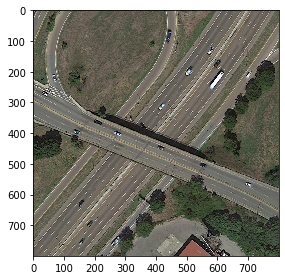

In [ ]:
image_qualities = []

with tqdm(total=len(imagenames), file=sys.stdout) as pbar:
    for image in imagenames:
        pbar.set_description('processed:')
        pbar.update(1)
        # quality
        quality = calc_brisque(image, None)
        image_qualities.append(quality)
        #if quality > 90 and quality < 100:
        #    print('high quality: ' + str(quality))
        #    show_image(image, None)
        #    break
        if quality < 5:
            print('low quality: ' + str(quality))
            show_image(image, None)
            break

#plot_hist(image_qualities, "Brisque quality Histogram on DIOR images", result_dir + 'hist_brisque.png')

In [ ]:
pd.DataFrame(class_bin_array).to_csv(result_dir + 'bin_count.csv', index=False, header=False)
pd.DataFrame(bin_threshs).to_csv(result_dir + 'bin_thresh.csv', index=False, header=False)
pd.DataFrame(bin_brisque_threshs).to_csv(result_dir + 'bin_brisque_thresh.csv', index=False, header=False)
